In [1]:
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math
%matplotlib inline
raw_data = pd.read_csv('kc_house_data.csv')
df = raw_data.copy()

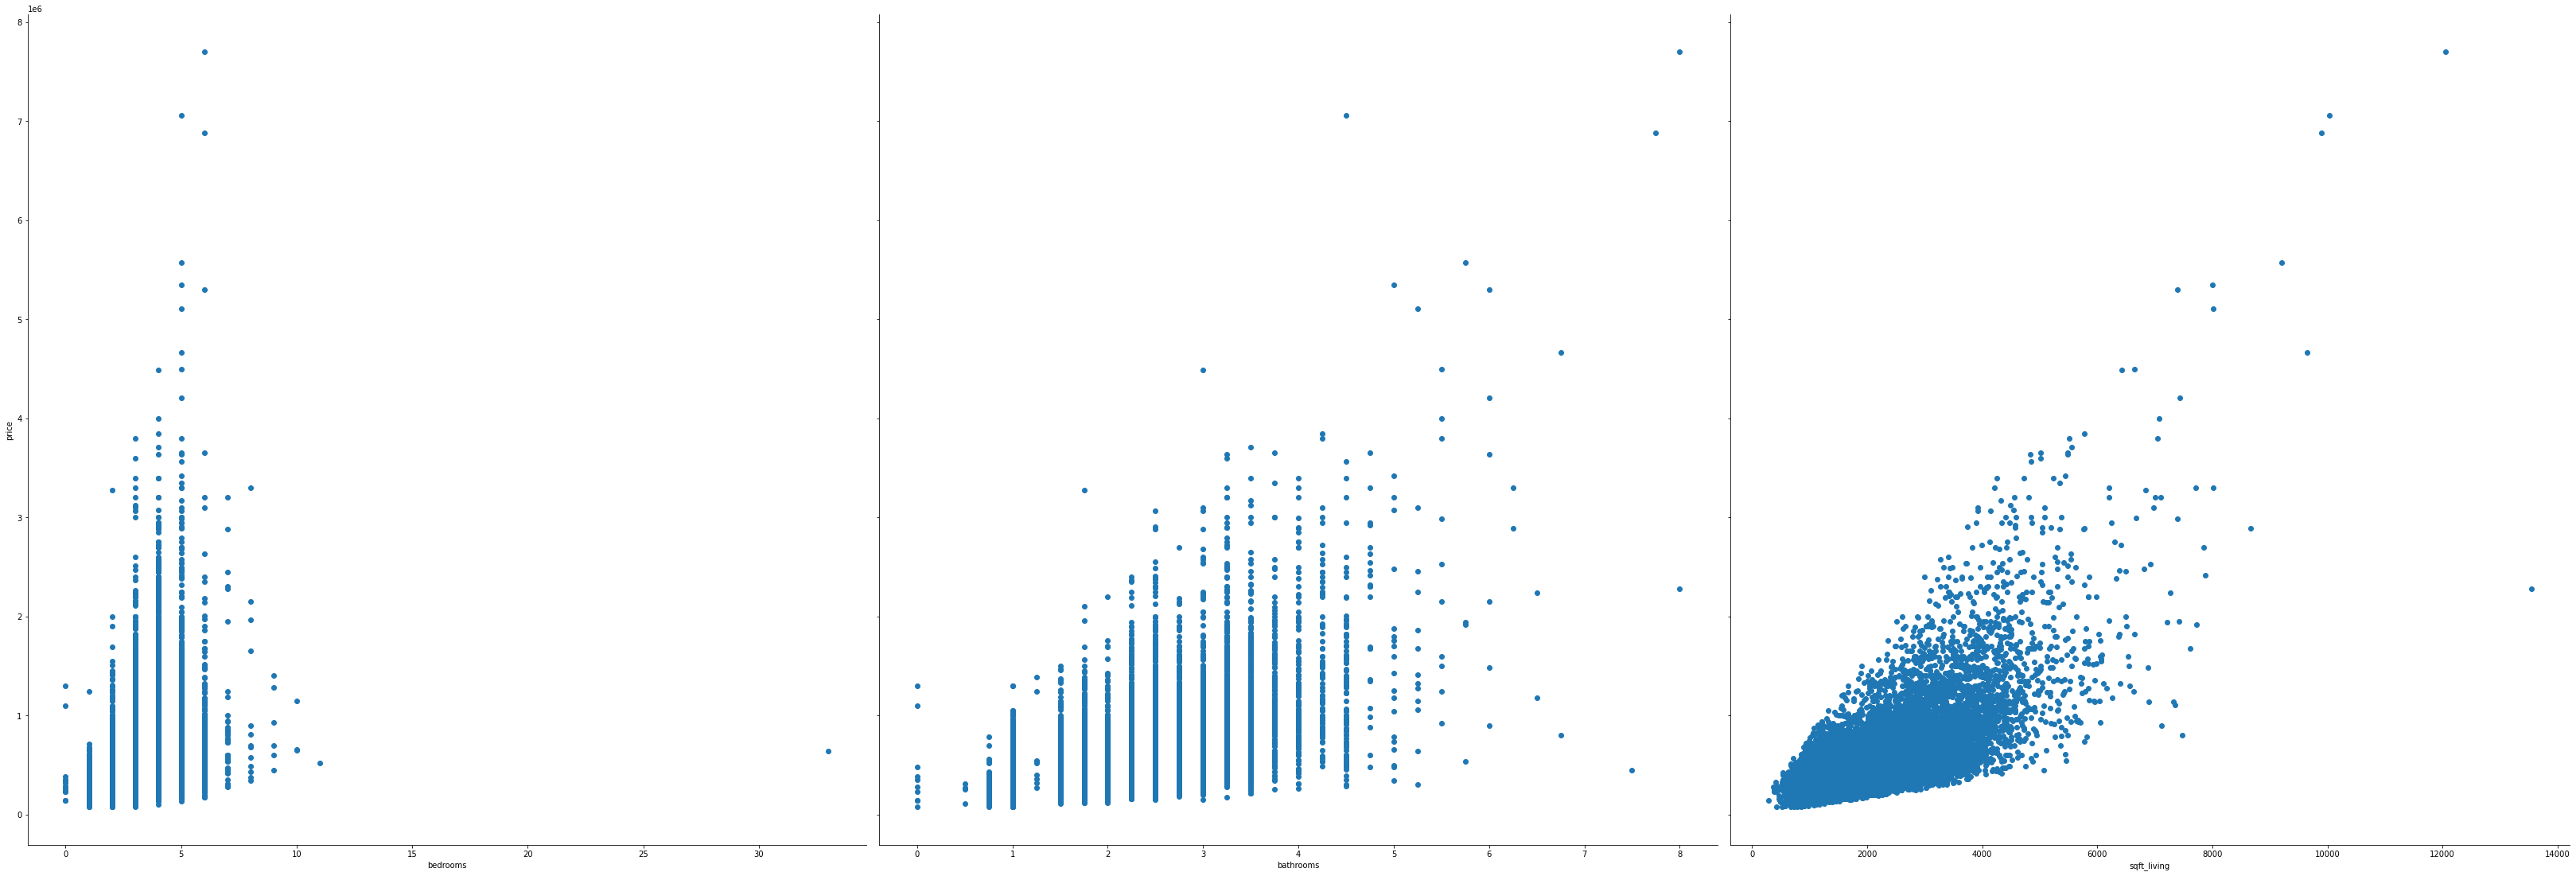

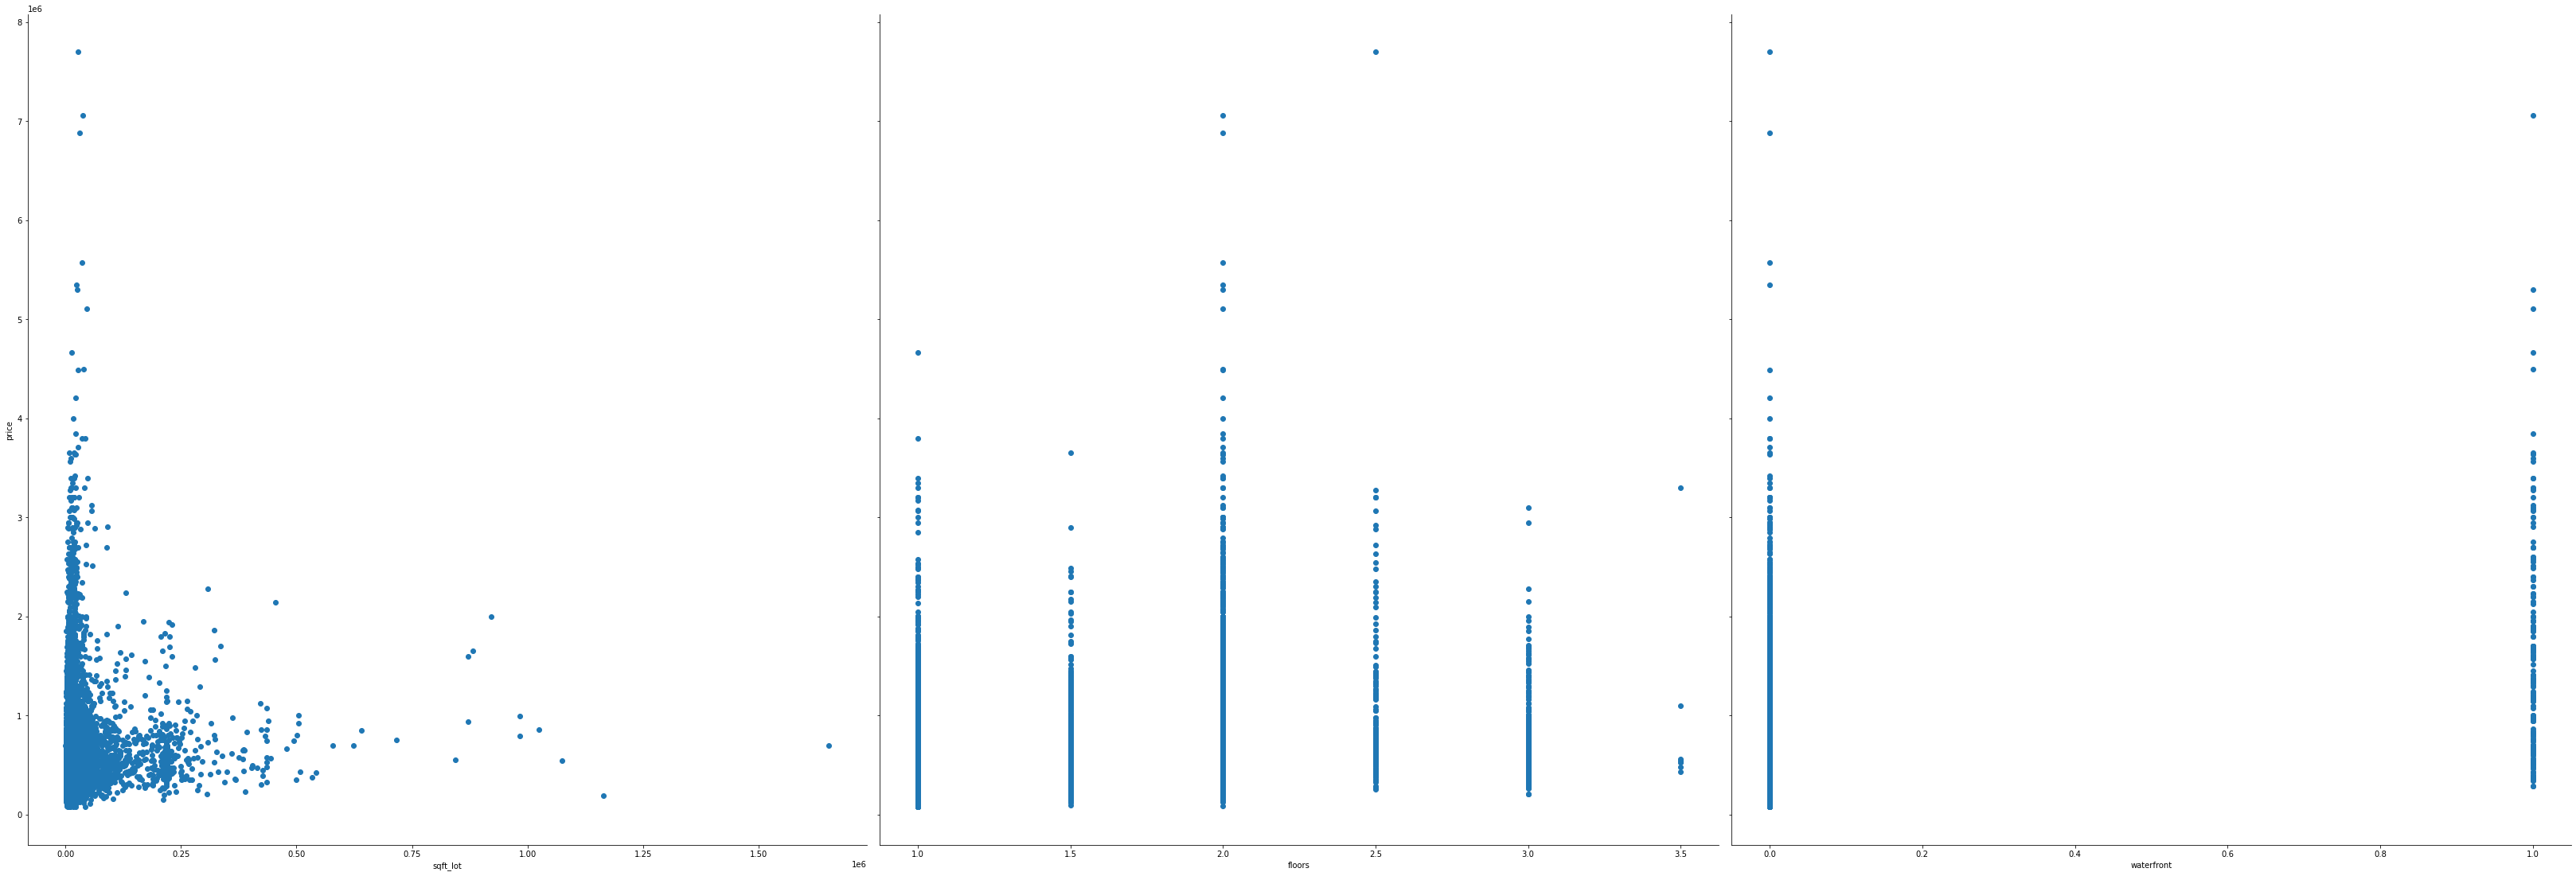

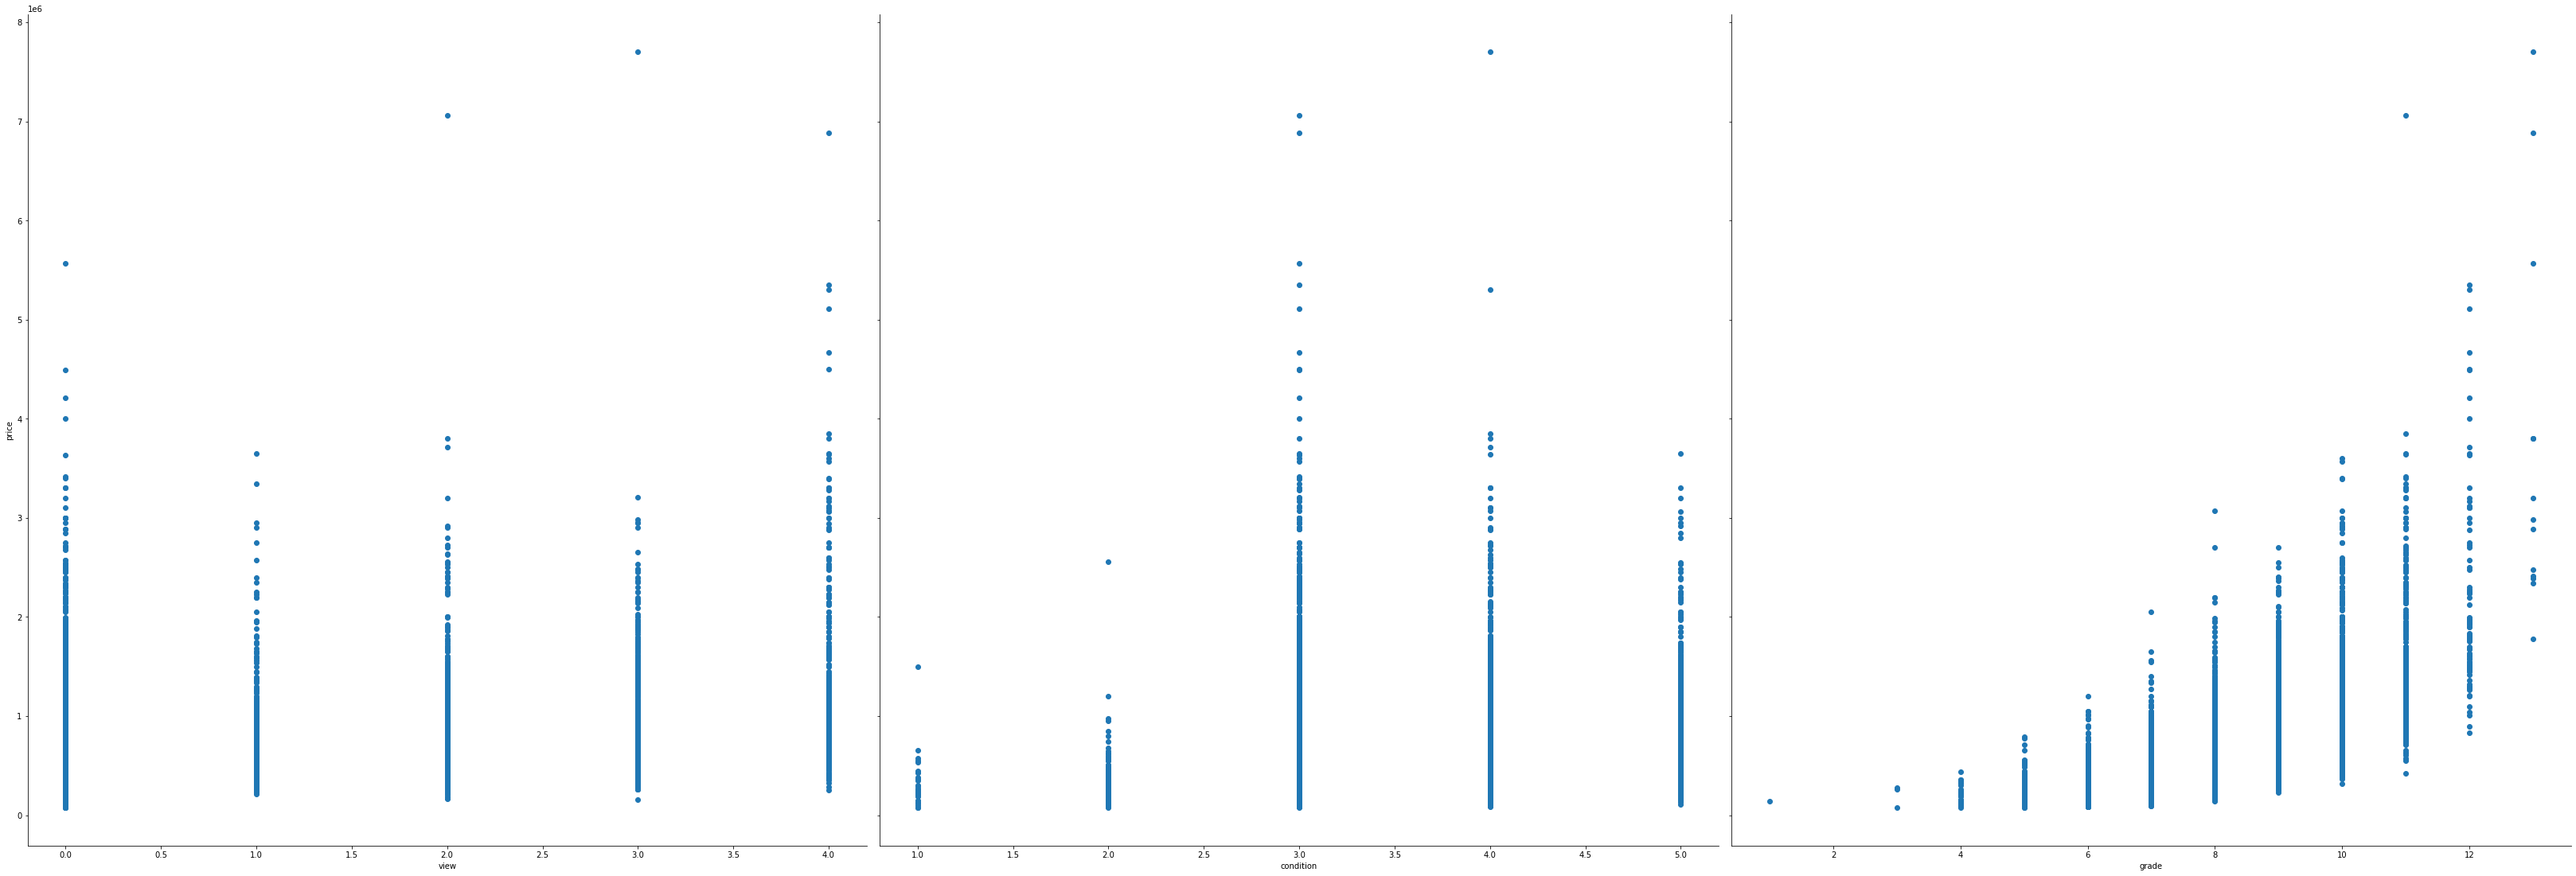

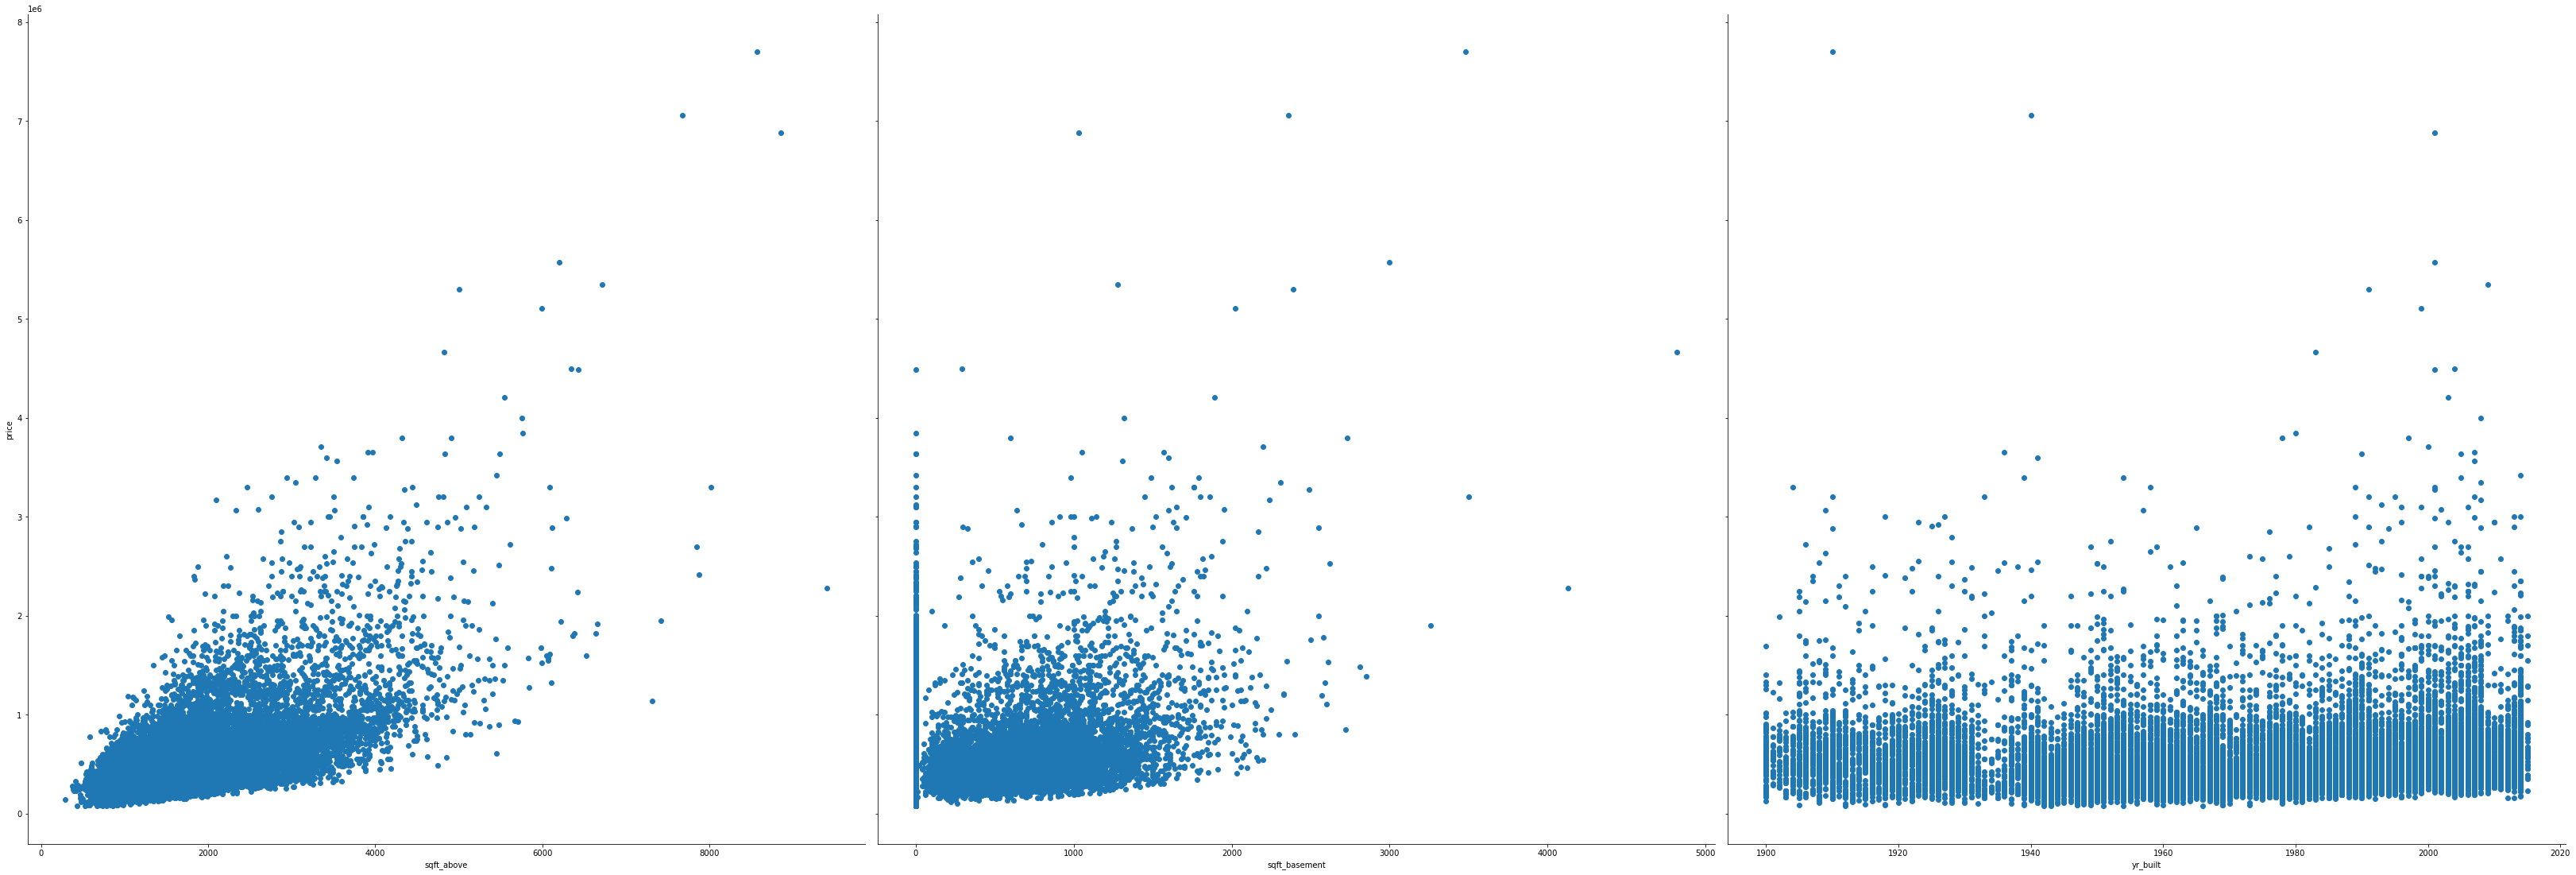

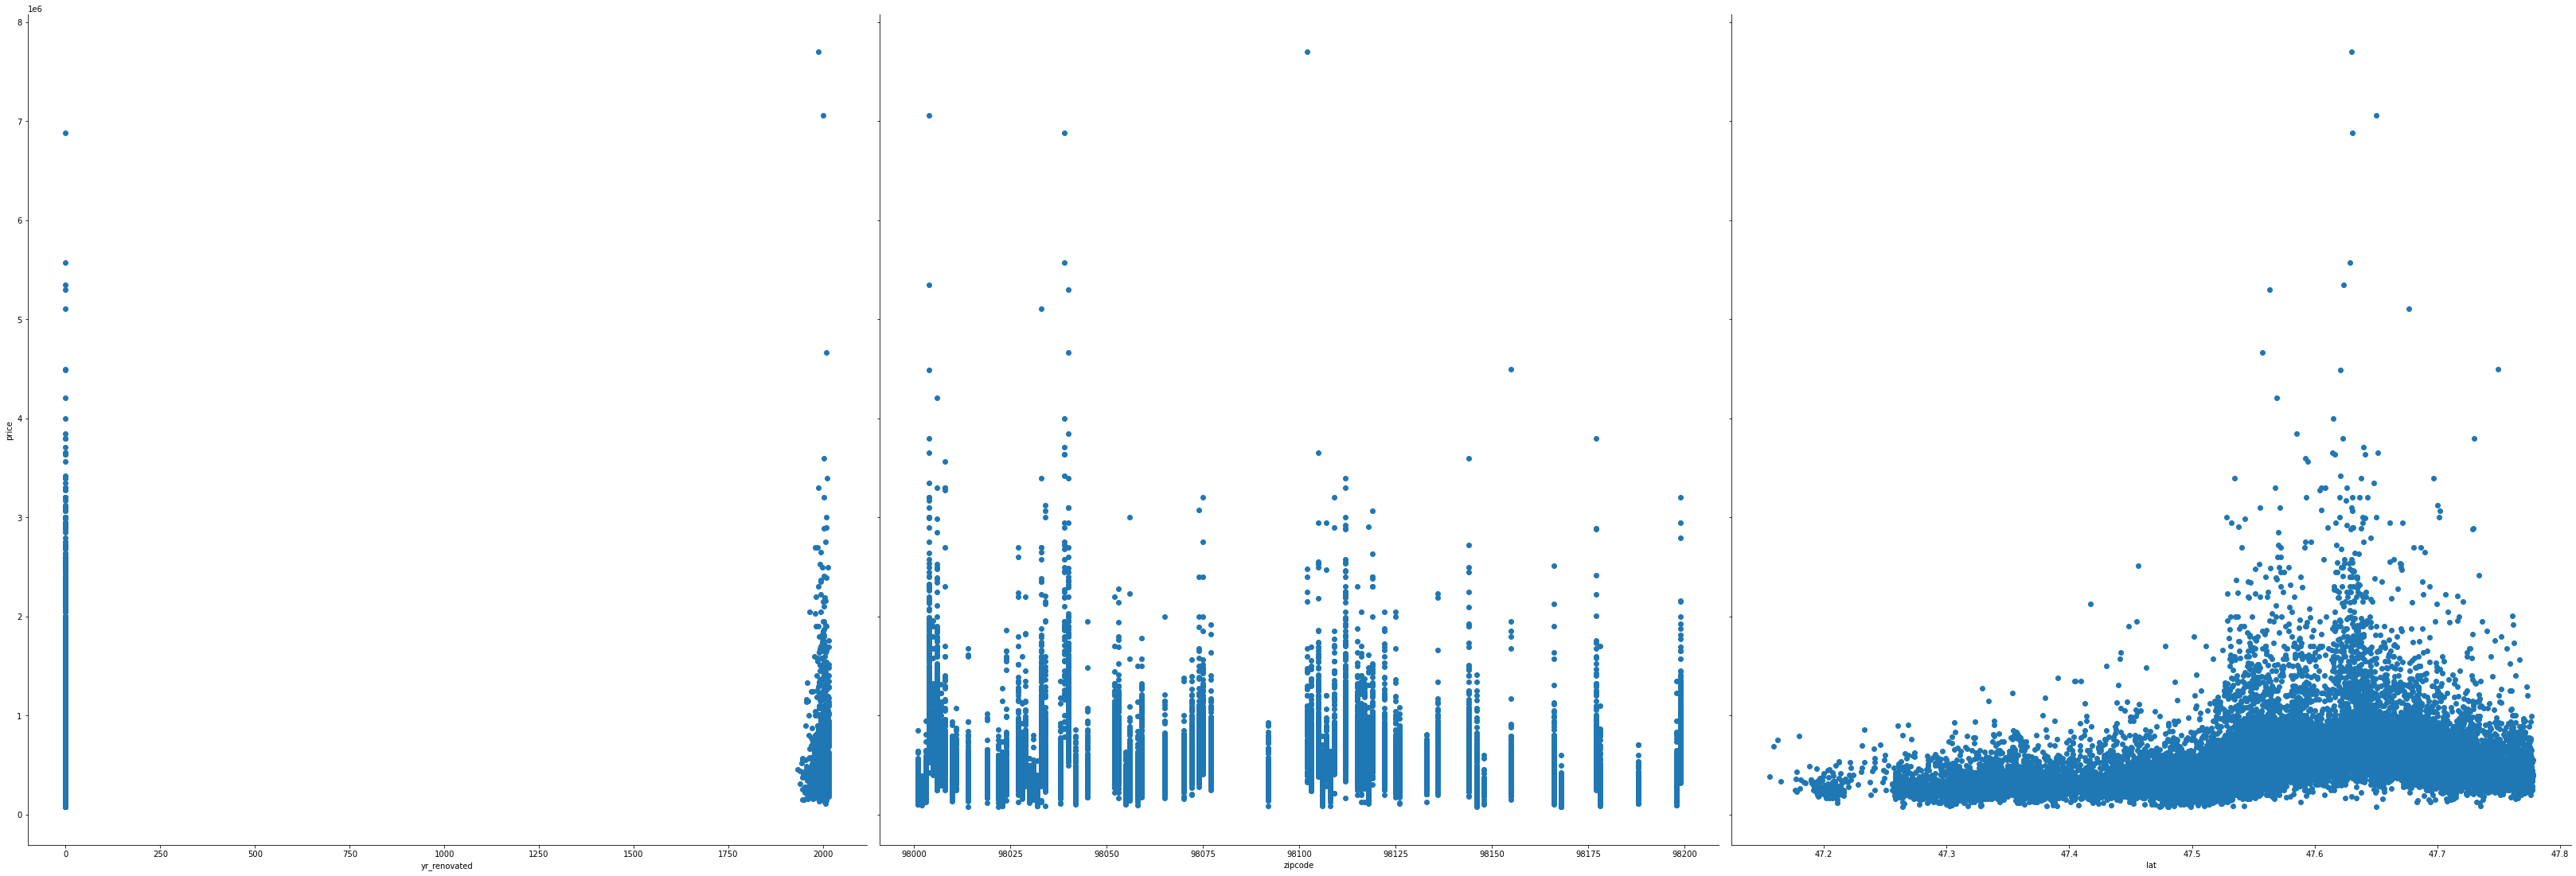

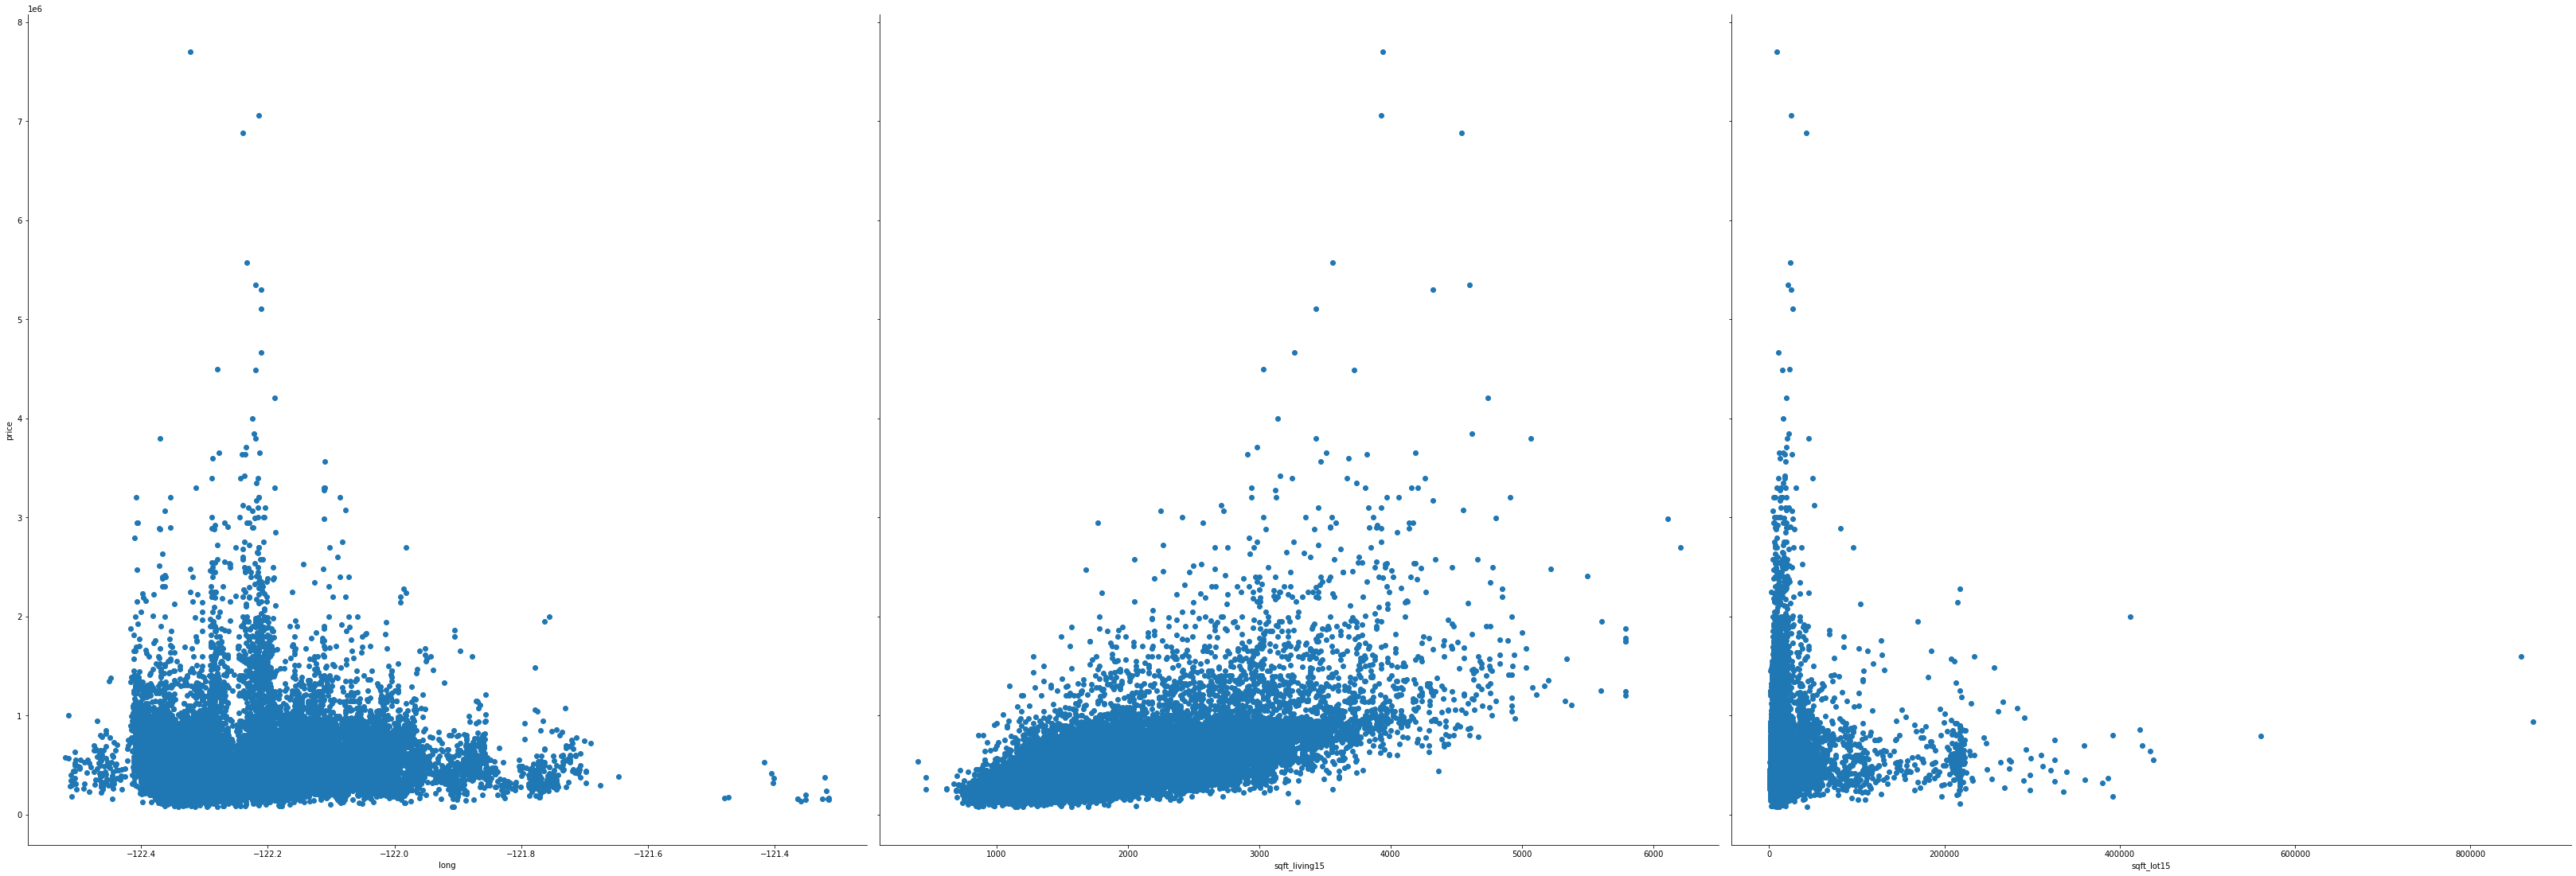

In [2]:

new = sns.PairGrid(df, x_vars=df.columns[3:6], y_vars=[
                   'price'], height=15, aspect=1)
new.map(plt.scatter)
new = sns.PairGrid(df, x_vars=df.columns[6:9], y_vars=[
                   'price'], height=15, aspect=1)
new.map(plt.scatter)
new = sns.PairGrid(df, x_vars=df.columns[9:12], y_vars=[
                   'price'], height=15, aspect=1)
new.map(plt.scatter)
new = sns.PairGrid(df, x_vars=df.columns[12:15], y_vars=[
                   'price'], height=15, aspect=1)
new.map(plt.scatter)
new = sns.PairGrid(df, x_vars=df.columns[15:18], y_vars=[
                   'price'], height=15, aspect=1)
new.map(plt.scatter)
new = sns.PairGrid(df, x_vars=df.columns[18:21], y_vars=[
                   'price'], height=15, aspect=1)
new.map(plt.scatter)
plt.show()


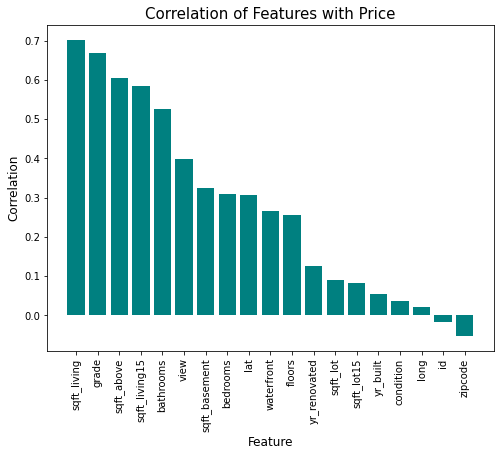

In [3]:
cor = df.corr()['price'].sort_values(ascending=False).drop(['price'])
plt.figure(figsize=(8, 6))
plt.bar(x=list(cor.index), height=list(cor.values), color='teal')
plt.xticks(rotation=90)
plt.xlabel('Feature', fontsize=12)
plt.ylabel('Correlation', fontsize=12)
plt.title('Correlation of Features with Price', fontsize=15)
plt.show()

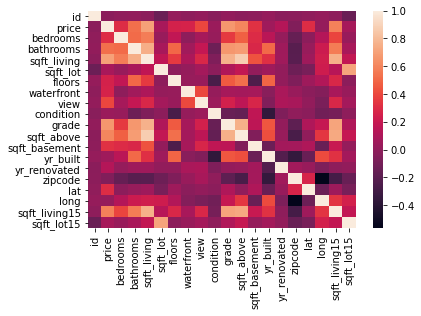

In [4]:
sns.heatmap(df.corr())
plt.show()

In [5]:
latSqrdList = [0]*len(df['lat'])
latcenter = 47.63
longcenter = -122.2
for i in range(len(df['lat'])):
    latSqrdList[i] += (df.at[i, 'lat'] - latcenter) ** 2
    latSqrdList[i] += (df.at[i, 'long'] - longcenter) ** 2
    latSqrdList[i] = -(latSqrdList[i] ** 0.5)

df['center_distance'] = latSqrdList

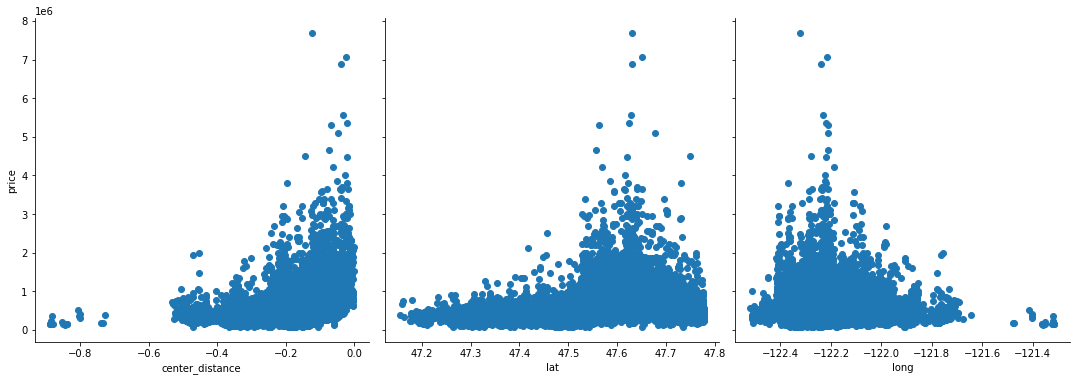

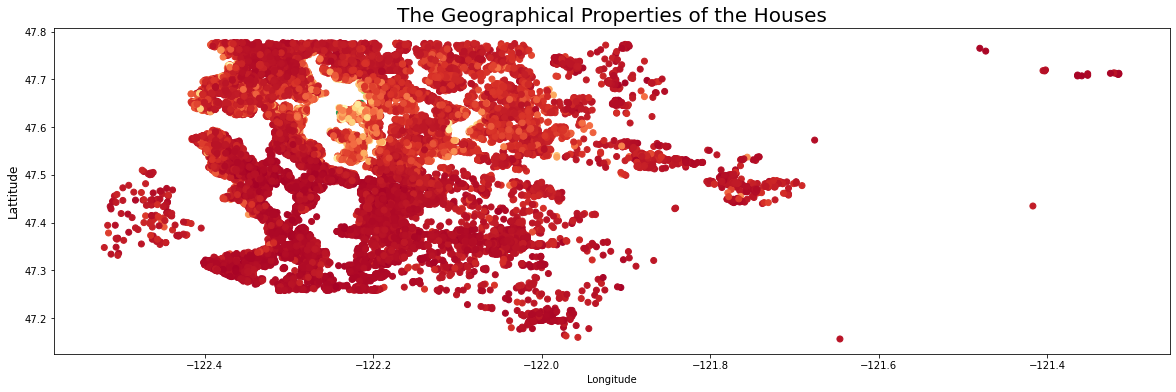

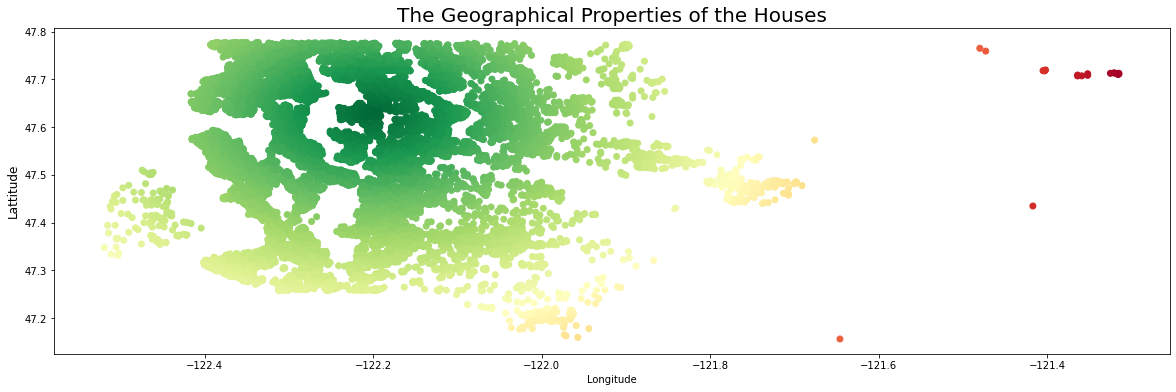

In [6]:

new = sns.PairGrid(df, x_vars=['center_distance', 'lat', 'long'], y_vars=[
                   'price'], height=5, aspect=1)
new.map(plt.scatter)
plt.show()

plt.figure(figsize=(20,6))
plt.scatter(x='long',y='lat',data=df, c='price',cmap='RdYlGn')
plt.xlabel('Longitude', fontsize=10)
plt.ylabel('Lattitude', fontsize=12)
plt.title('The Geographical Properties of the Houses', fontsize=20)
plt.show()

plt.figure(figsize=(20,6))
plt.scatter(x='long',y='lat',data=df, c='center_distance',cmap='RdYlGn')
plt.xlabel('Longitude', fontsize=10)
plt.ylabel('Lattitude', fontsize=12)
plt.title('The Geographical Properties of the Houses', fontsize=20)
plt.show()

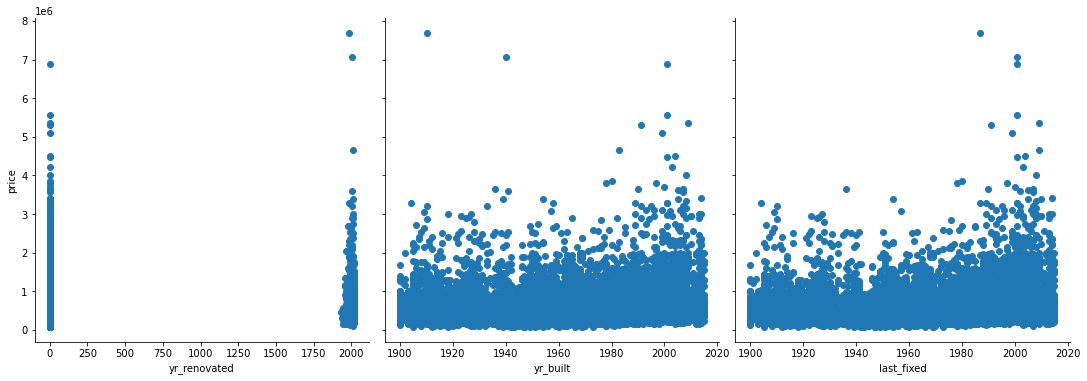

In [7]:
lastFixedList = [0]*len(df['yr_renovated'])
for i in range(len(df['yr_built'])):
    lastFixedList[i] = (max(df.at[i, 'yr_built'], df.at[i, 'yr_renovated']))

df['last_fixed'] = lastFixedList

df.head()

new=sns.PairGrid(df,x_vars=['yr_renovated', 'yr_built', 'last_fixed'], y_vars=['price'],height=5,aspect=1)
new.map(plt.scatter)
plt.show()